## Read in the Data

In [1]:
# Imports and colors and numbers that won't change
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import scipy.stats as stats
#First year of data will not change, last year is not inclusive
min_data_year = 1880
max_data_year = 2025
female_color = 'xkcd:pink'
male_color = 'xkcd:light blue'
default_color = 'xkcd:periwinkle'
default_color2 = 'xkcd:grass green'
colors = ['xkcd:red','xkcd:orange','xkcd:mustard','xkcd:grass green', 'xkcd:light blue','xkcd:cerulean','xkcd:indigo', 
          'xkcd:lavender', 'xkcd:pink', 'xkcd:black', 'xkcd:tan', 'xkcd:grey blue']
generation_starts = {'Missionary' : 1880, 'Lost' : 1883, 'Greatest' : 1901, 'Silent' : 1928, 'Boomers' : 1946, 'Gen X' : 1965, 'Milennial' : 1981,
                     'Gen X' : 1997, 'Gen Alpha' : 2010}

In [2]:
# data = pd.DataFrame(columns = ['name', 'sex', 'total_count'] + [str(year) for year in range(1880, 2025)])
# for i in range(min_data_year, max_data_year):
#     current_df = pd.read_csv("names/yob"+str(i)+".txt", delimiter = ",", names = ['Name', 'Sex', 'Count'])
#     for index, row in current_df.iterrows():
#         current_name = row['Name']
#         current_sex = row['Sex']
#         current_count = row['Count']
#         current_year = str(i)
#         matches = (data['name'] == current_name) & (data['sex'] == current_sex)
#         if matches.any():
#             data.loc[matches, current_year] = current_count
#             data.loc[matches, 'total_count'] += current_count
#         else:
#             new_row = {col: 0 for col in data.columns}
#             new_row = {col: 0 for col in data.columns}
#             new_row['name'] = current_name
#             new_row['sex'] = current_sex
#             new_row[current_year] = current_count
#             new_row['total_count'] = current_count
#             data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)

# data
# data.to_csv("SSANameData.txt")

In [2]:
data = pd.read_csv("SSANameData.txt")

## Methods

In [1]:
import functions as fun

## Graphs

### Single Name Graph
Give one name and the associated sex and a graph will be displayed of the number of babies of that sex given that name over time. The default range of years is 1880 to the most recent year, but can be changed. A single year is also  given, within the range, to print the specific count and rank for that year and to be displaayed on the graph.

In [ ]:
name, sex = fun.name_input("name")
min_y, max_y = fun.year_input()
year = fun.single_year_input(min_y, max_y)
show = True
name_counts, ignore = fun.name_counts_years(name, sex, min_y, max_y)
earliest_year = fun.first_nonzero(name_counts, min_y)
latest_year = fun.last_nonzero(name_counts, min_y)

total_sum = int(sum(name_counts))
percent_change, initial, final = fun.calculate_percent_change(name_counts)
rank = fun.get_rank(name, sex, year)
change_verb = "increase" if percent_change > 0 else "decrease"
percent_change = abs(percent_change)
color = female_color if sex == 'f' else male_color
peak_count_year, peak_count = fun.peak_year(name_counts, min_y)
title = f"Number of {sex} named {name} by year"
label = f"{name}, {sex}"
fun.make_graph(title, range(min_y, max_y), name_counts, year, label, color, True)
plt.show()

print(f"The first year with more than five of this start was {earliest_year}")
print(f"The last year with more than five of this start was {latest_year}")
print(f"The name peaked in {peak_count_year} with {peak_count}")
print(f"In {year} there were {int(name_counts[year - min_y])} {sex} babies given the name {name} and its rank was {rank}")
print(f"There have been a total of {total_sum} babies named {name}")
print(f"The name {change_verb}d from {initial} to {final}, a {percent_change:.2f}% {change_verb} over {min_y} to {max_y - 1}")

KeyboardInterrupt: Interrupted by user

### Multiple Name Graph
Performs the same operations as above, but for multiple names and their associated sexes. The year range can be altered and a single year is given to be graphed, but no additional information is printed

the data ranges from 1880 to 2025


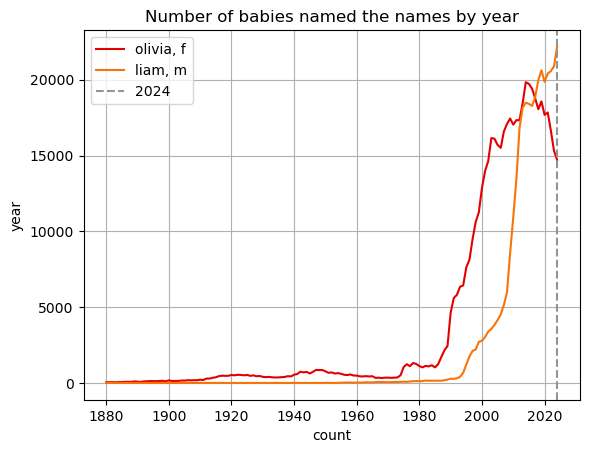

In [ ]:
name_list, sex_list, year, min_y, max_y = fun.multiple_inputs()

color_index = 0

for i in range(len(name_list)):
    name_counts, ignore = fun.name_counts_years(name_list[i], sex_list[i], min_y, max_y)
    plt.plot(range(min_y, max_y), name_counts, color = colors[color_index], label = f"{name_list[i]}, {sex_list[i]}")
    if color_index == len(colors) - 1:
        color_index = 0
    else:
        color_index += 1

fun.format_graph("Number of babies named the names by year", year, show = True)
plt.show()

### Same Name For Both Sexes

the data ranges from 1880 to 2025


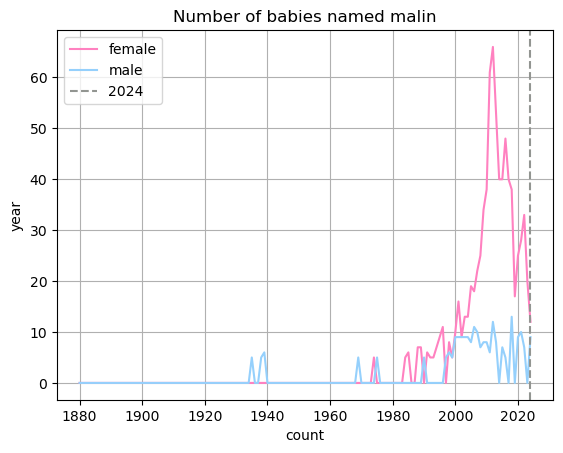

In 2024 there were 12 girls and 9 boys named malin.
For girls the name increased from 1 to 12, a 1100.00% increase over 1880 to 2024.
For boys the name increased from 1 to 9, a 800.00% increase over 1880 to 2024.
There is a 112.71% difference between male and female, with more female.
There have been 824 girls named malin and 230 boys.


In [ ]:
name = input("Enter the name: ")
min_y, max_y = fun.year_input()
year = fun.single_year_input(min_y, max_y)
show = True
name_counts_f, ignore = fun.name_counts_years(name, "f", min_y, max_y)
name_counts_m, ignore = fun.name_counts_years(name, "m", min_y, max_y)

total_sum_f = int(sum(name_counts_f))
percent_change_f, initial_f, final_f = fun.calculate_percent_change(name_counts_f)
change_verb_f = "increase" if percent_change_f > 0 else "decrease"
percent_change_f = abs(percent_change_f)
total_sum_m = int(sum(name_counts_m))
percent_change_m, initial_m, final_m = fun.calculate_percent_change(name_counts_m)
change_verb_m = "increase" if percent_change_m > 0 else "decrease"
percent_change_m = abs(percent_change_m)
per_diff = fun.calculate_percent_diff(total_sum_f, total_sum_m)

plt.plot(range(min_y,max_y), name_counts_f, color = female_color, label = "female")
plt.plot(range(min_y,max_y), name_counts_m, color = male_color, label = "male")
fun.format_graph(f"Number of babies named {name}", year, True)
plt.show()

print(f"In {year} there were {int(name_counts_f[year - min_y])} girls and {int(name_counts_m[year - min_y])} boys named {name}.")
print(f"For girls the name {change_verb_f}d from {initial_f} to {final_f}, a {percent_change_f:.2f}% {change_verb_f} over {min_y} to {max_y - 1}.")
print(f"For boys the name {change_verb_m}d from {initial_m} to {final_m}, a {percent_change_m:.2f}% {change_verb_m} over {min_y} to {max_y - 1}.")
print(f"There is a {per_diff:.2f}% difference between male and female, with more {"female" if total_sum_f > total_sum_m else "male"}.")
print(f"There have been {total_sum_f} girls named {name} and {total_sum_m} boys.")

### Top Names in Year Range

In [2]:
fun.top_names('b')

,total
name,
james,5238570
john,5174470
robert,4845891
michael,4418526
william,4189004
...,...
kager,5
kahtai,5
shervonda,5
